<a href="https://colab.research.google.com/github/subhedarsoham18/housing/blob/main/task3ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   price                            545 non-null    int64
 1   area                             545 non-null    int64
 2   bedrooms                         545 non-null    int64
 3   bathrooms                        545 non-null    int64
 4   stories                          545 non-null    int64
 5   mainroad                         545 non-null    int64
 6   guestroom                        545 non-null    int64
 7   basement                         545 non-null    int64
 8   hotwaterheating                  545 non-null    int64
 9   airconditioning                  545 non-null    int64
 10  parking                          545 non-null    int64
 11  prefarea                         545 non-null    int64
 12  furnishingstatus_semi-furnished  545 non-null    i

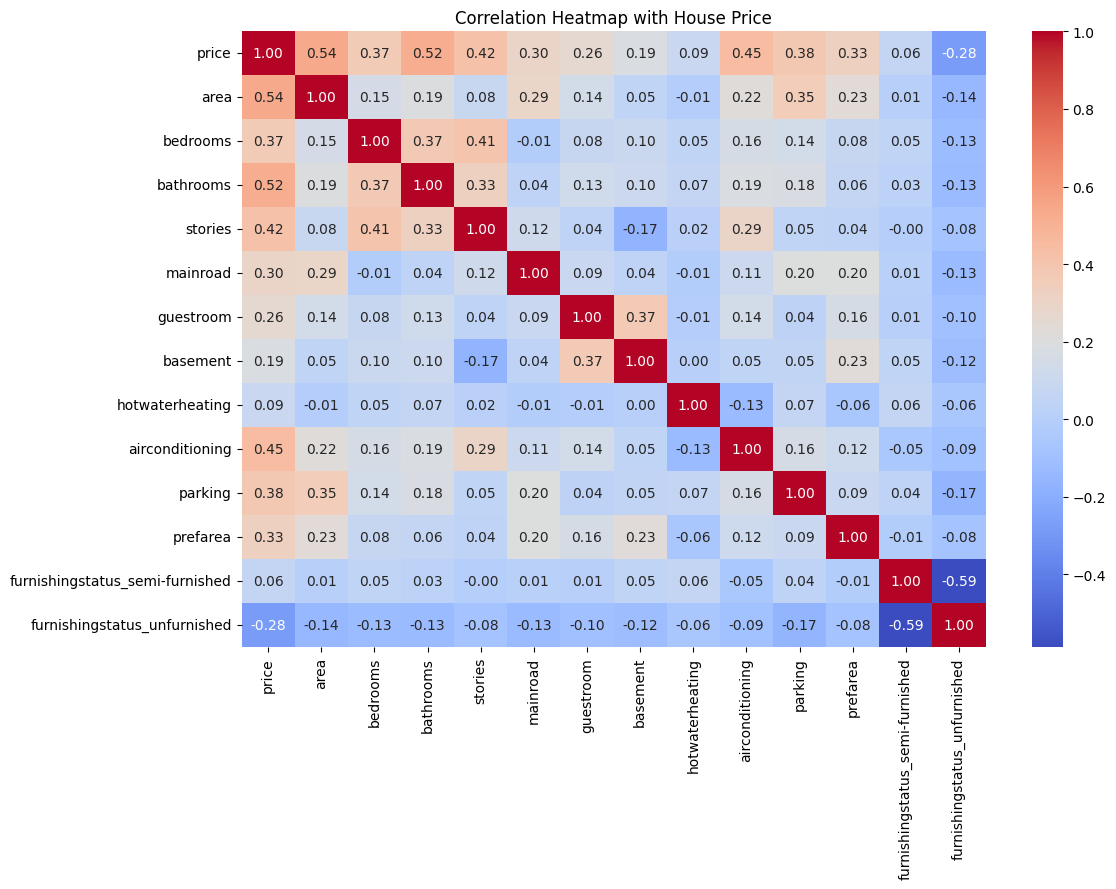

<Axes: xlabel='area', ylabel='price'>

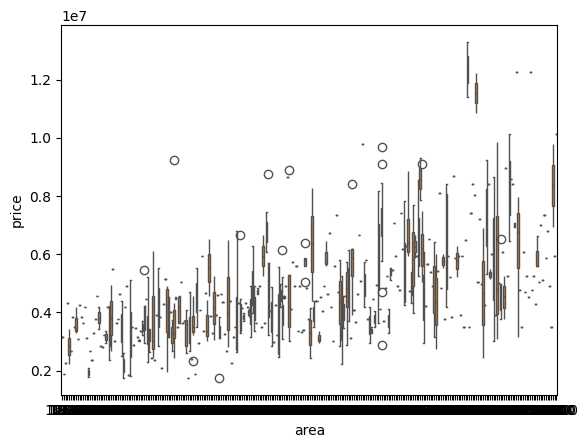

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
df = pd.read_csv('/content/Housing.csv')


binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

for col in binary_cols:
    df[col] = df[col].astype(str).str.strip().str.lower().map({'yes': 1, 'no': 0})


df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)


for col in df.columns:
    if df[col].dtype == 'bool' or (df[col].nunique() == 2 and df[col].dtype != 'int64'):
        df[col] = df[col].astype(int)


print(df.info())
print(df.isnull().sum())


plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap with House Price")
plt.show()
sns.scatterplot(data = df, x = 'area', y = 'price')
sns.boxplot(data = df, x = 'area', y = 'price')

<Axes: xlabel='price', ylabel='Count'>

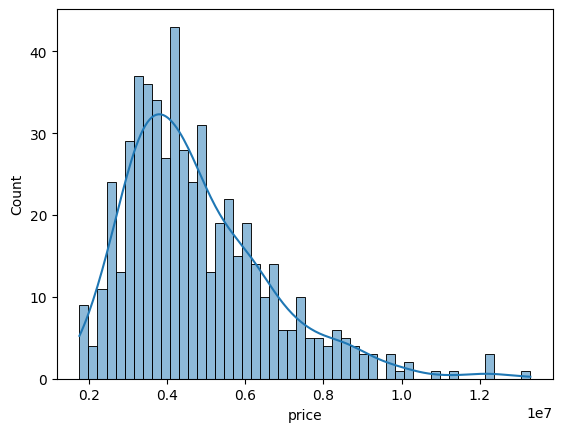

In [12]:
sns.histplot(df['price'], bins = 50, kde = True)

In [13]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus_semi-furnished',
       'furnishingstatus_unfurnished'],
      dtype='object')

<Axes: xlabel='bedrooms', ylabel='price'>

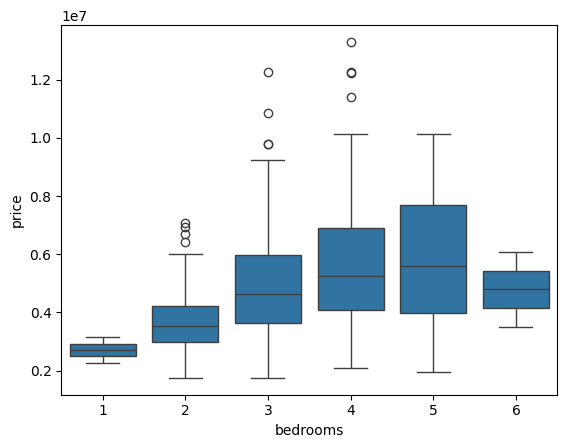

In [14]:
sns.boxplot(data = df, x = 'bedrooms', y = 'price')

In [15]:
x = df.drop(columns = ['price'], axis = 1)
y = df['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 2)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("📉 Mean Squared Error:", mse)
print("📊 R^2 Score:", r2)


📉 Mean Squared Error: 939768794053.3127
📊 R^2 Score: 0.6735304387431789
